In [25]:
import pandas as pd
import scipy
from scipy import stats, optimize, interpolate
import sklearn
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [15]:
df = pd.read_csv('data.csv')
df.head()

,quality,bits,intra_parts,skip_parts,inter_16x16_parts,inter_4x4_parts,inter_other_parts,non_zero_pixels,frame_width,frame_height,...,sobel_h,sobel_v,variance,block_movement_h,block_movement_v,var_movement_h,var_movement_v,cost_1,cost_2,relevant
0,22,2143,0,0,1,3,21,404,416,240,...,17.397461,17.397461,87.584335,2.820312,2.539062,10.772400,8.576599,0.0,0.0,1.0
1,22,1735,0,2,0,3,8,381,416,240,...,14.426758,14.233398,48.025330,1.843750,1.921875,6.163086,6.665771,8816.0,8801.0,1.0
2,22,1971,0,0,0,0,8,460,416,240,...,15.203125,13.953125,56.613480,3.000000,4.937500,1.625000,3.683594,5104.0,5193.0,1.0
3,22,2473,0,0,0,18,20,421,416,240,...,21.725586,29.165039,283.079285,2.078125,2.500000,25.806396,34.656250,21531.0,19802.0,1.0
4,22,1093,0,0,1,3,8,167,416,240,...,11.929688,14.353516,175.123245,3.070312,4.523438,22.252869,14.780701,15073.0,14549.0,1.0


In [61]:
# Checking for null, nan
df.isnull().any()

quality              False
bits                 False
intra_parts          False
skip_parts           False
inter_16x16_parts    False
inter_4x4_parts      False
inter_other_parts    False
non_zero_pixels      False
frame_width          False
frame_height         False
movement_level       False
mean                 False
sub_mean_1           False
sub_mean_2           False
sub_mean_3            True
sub_mean_4           False
var_sub_blocks       False
sobel_h              False
sobel_v              False
variance             False
block_movement_h     False
block_movement_v     False
var_movement_h       False
var_movement_v       False
cost_1               False
cost_2                True
relevant              True
dtype: bool

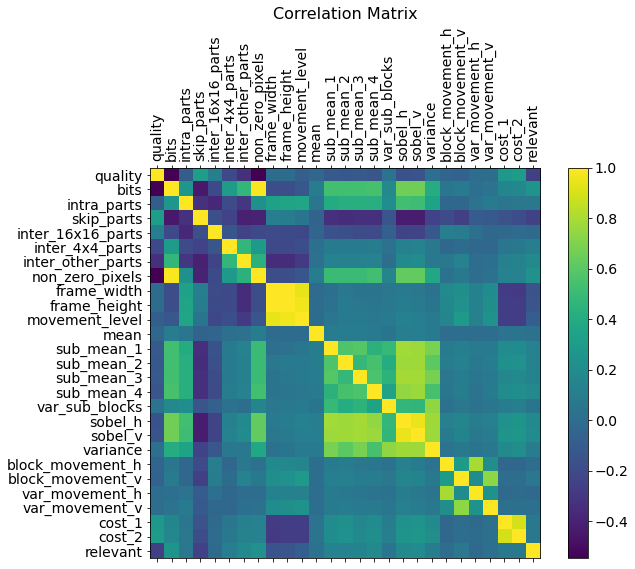

In [62]:
f = plt.figure(figsize=(10, 7))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=90)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);      

In [63]:
# selected correlations
print(df["quality"].corr(df["relevant"]))
print(df["bits"].corr(df["relevant"]))
df["quality"].corr(df["bits"])

-0.25079674402987057
0.25239296708669906


-0.5461690258502212

In [64]:
# creting a table of categorical and continuous data
cat = df.loc[:, df.nunique() < 200]
cont = df.loc[:, df.nunique() >= 200]

In [65]:
#print(cont.nunique())
#cat.nunique()

In [41]:
# Data Normalization
cont_val = cont.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
cont_scaled = min_max_scaler.fit_transform(cont_val)
cont_sc = pd.DataFrame(cont_scaled)
cont_sc.columns=cont.columns

In [56]:
#cont_sc.head()

In [67]:
cont.corrwith(cat.relevant)

bits                0.252393
non_zero_pixels     0.236884
movement_level     -0.085982
mean                0.028971
sub_mean_1          0.141184
sub_mean_2          0.138525
sub_mean_3          0.151905
sub_mean_4          0.179225
var_sub_blocks      0.054598
sobel_h             0.194505
sobel_v             0.197248
variance            0.102842
block_movement_h    0.009136
block_movement_v    0.067436
var_movement_h     -0.016549
var_movement_v      0.015649
cost_1              0.079386
cost_2              0.075446
dtype: float64

In [37]:
con_sc.corrwith(cat.relevant)  # looks like normalozation of categorical variaables doesn't have an affect on correlation

0     0.252393
1     0.236884
2    -0.085982
3     0.028971
4     0.141184
5     0.138525
6     0.151905
7     0.179225
8     0.054598
9     0.194505
10    0.197248
11    0.102842
12    0.009136
13    0.067436
14   -0.016549
15    0.015649
16    0.079386
17    0.075446
dtype: float64

In [57]:
# Caregorical data factorization
cat_fc =  pd.DataFrame(cat.apply(lambda x: pd.factorize(x)[0]))
cat_fc.head()

,quality,intra_parts,skip_parts,inter_16x16_parts,inter_4x4_parts,inter_other_parts,frame_width,frame_height,relevant
0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,0,1,0,0,0
2,0,0,0,1,1,1,0,0,0
3,0,0,0,1,2,2,0,0,0
4,0,0,0,0,0,1,0,0,0


In [59]:
cat.corrwith(cat.relevant)

quality             -0.250797
intra_parts          0.075806
skip_parts          -0.241371
inter_16x16_parts   -0.010243
inter_4x4_parts      0.114044
inter_other_parts    0.195646
frame_width         -0.148213
frame_height        -0.137324
relevant             1.000000
dtype: float64

In [60]:
cat_fc.corrwith(cat.relevant) # feels like some date is not categorical as corelation reduces

quality             -0.250797
intra_parts         -0.010367
skip_parts          -0.211984
inter_16x16_parts   -0.022105
inter_4x4_parts      0.075426
inter_other_parts    0.066557
frame_width         -0.027086
frame_height        -0.027086
relevant            -1.000000
dtype: float64

In [ ]:
#FINISH

In [40]:
# Previous Coding stuff at class

In [14]:
cat_mask = (df.dtypes==object)
cat_cols = df.columns[cat_mask].tolist()
df_cat = df[cat_cols]
df_num = df.drop(cat_cols, axis=1)

In [17]:
df_cat

,Sex,Embarked
PassengerId,,
1,male,S
2,female,C
3,female,S
4,female,S
5,male,S
...,...,...
887,male,S
888,female,S
889,female,S


In [23]:
from sklearn.impute import SimpleImputer
imp_cat = SimpleImputer(strategy='most_frequent')
df_cat = pd.DataFrame(imp_cat.fit_transform(df_cat),
                      columns=df_cat.columns, index=df_cat.index)

In [25]:
df_cat.isnull().any()

Sex         False
Embarked    False
dtype: bool

In [27]:
from sklearn import preprocessing
from collections import defaultdict

d = defaultdict(preprocessing.LabelEncoder)

df_cat_le = df_cat.apply(lambda col: d[col.name].fit_transform(col))
df_cat_le

,Sex,Embarked
PassengerId,,
1,1,2
2,0,0
3,0,2
4,0,2
5,1,2
...,...,...
887,1,2
888,0,2
889,0,2


In [35]:
ohe = preprocessing.OneHotEncoder(sparse=False)
df_cat_ohe = pd.DataFrame(ohe.fit_transform(df_cat),
                          columns=ohe.get_feature_names(df_cat.columns.tolist()),
                          index=df_cat.index)

In [37]:
df_cat_ohe.pop('Sex_female')

PassengerId
1      0.0
2      1.0
3      1.0
4      1.0
5      0.0
      ... 
887    0.0
888    1.0
889    1.0
890    0.0
891    0.0
Name: Sex_female, Length: 891, dtype: float64

In [38]:
df_cat_ohe

,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,
1,1.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0
5,1.0,0.0,0.0,1.0
...,...,...,...,...
887,1.0,0.0,0.0,1.0
888,0.0,0.0,0.0,1.0
889,0.0,0.0,0.0,1.0


In [43]:
imp_num = SimpleImputer(strategy='mean')
df_num = pd.DataFrame(imp_num.fit_transform(df_num),
                      columns=df_num.columns, index=df_num.index)
df_num

,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,,
1,0.0,3.0,22.000000,1.0,0.0,7.2500
2,1.0,1.0,38.000000,1.0,0.0,71.2833
3,1.0,3.0,26.000000,0.0,0.0,7.9250
4,1.0,1.0,35.000000,1.0,0.0,53.1000
5,0.0,3.0,35.000000,0.0,0.0,8.0500
...,...,...,...,...,...,...
887,0.0,2.0,27.000000,0.0,0.0,13.0000
888,1.0,1.0,19.000000,0.0,0.0,30.0000
889,0.0,3.0,29.699118,1.0,2.0,23.4500


In [44]:
df_num.isnull().any()

Survived    False
Pclass      False
Age         False
SibSp       False
Parch       False
Fare        False
dtype: bool

In [45]:
df_preprocessed = pd.merge(left=df_cat_ohe,
                           right=df_num,
                           on='PassengerId')
class_col = df_preprocessed.pop('Survived')
df_preprocessed

,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,,,,,,
1,1.0,0.0,0.0,1.0,0.0,3.0,22.000000,1.0,0.0,7.2500
2,0.0,1.0,0.0,0.0,1.0,1.0,38.000000,1.0,0.0,71.2833
3,0.0,0.0,0.0,1.0,1.0,3.0,26.000000,0.0,0.0,7.9250
4,0.0,0.0,0.0,1.0,1.0,1.0,35.000000,1.0,0.0,53.1000
5,1.0,0.0,0.0,1.0,0.0,3.0,35.000000,0.0,0.0,8.0500
...,...,...,...,...,...,...,...,...,...,...
887,1.0,0.0,0.0,1.0,0.0,2.0,27.000000,0.0,0.0,13.0000
888,0.0,0.0,0.0,1.0,1.0,1.0,19.000000,0.0,0.0,30.0000
889,0.0,0.0,0.0,1.0,0.0,3.0,29.699118,1.0,2.0,23.4500


In [55]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

fs_k_best_chi2 = SelectKBest(chi2, k=4)
fs_k_best_chi2.fit(df_preprocessed, class_col)
col_filter = fs_k_best_chi2.get_support()
df_k_best_chi2 = df_preprocessed.iloc[:, col_filter]
df_k_best_chi2

,Sex_male,Pclass,Age,Fare
PassengerId,,,,
1,1.0,3.0,22.000000,7.2500
2,0.0,1.0,38.000000,71.2833
3,0.0,3.0,26.000000,7.9250
4,0.0,1.0,35.000000,53.1000
5,1.0,3.0,35.000000,8.0500
...,...,...,...,...
887,1.0,2.0,27.000000,13.0000
888,0.0,1.0,19.000000,30.0000
889,0.0,3.0,29.699118,23.4500


In [56]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

fs_k_best_mi = SelectKBest(mutual_info_classif, k=4)
fs_k_best_mi.fit(df_preprocessed, class_col)
col_filter = fs_k_best_mi.get_support()
df_k_best_mi = df_preprocessed.iloc[:, col_filter]
df_k_best_mi

,Sex_male,Pclass,SibSp,Fare
PassengerId,,,,
1,1.0,3.0,1.0,7.2500
2,0.0,1.0,1.0,71.2833
3,0.0,3.0,0.0,7.9250
4,0.0,1.0,1.0,53.1000
5,1.0,3.0,0.0,8.0500
...,...,...,...,...
887,1.0,2.0,0.0,13.0000
888,0.0,1.0,0.0,30.0000
889,0.0,3.0,1.0,23.4500
